In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from algos import *
import math
import torch
import utils
from scipy import stats

In [ ]:
#Headline experiments, spherical. Vary n. Fix parameters d = 10, u = 10*sqrt(d), rho = 0.5. t = 1 through 4.
args = utils.parse_args()
args.d = 10
dist_mean = torch.zeros(args.d)
dist_cov = torch.eye(args.d)
args.u = 10*np.sqrt(args.d)
args.total_budget = .5

Ps1 = [args.total_budget]
Ps2 = [(1.0/4.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps3 = [(1.0/8.0)*args.total_budget, (1.0/8.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps4 = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps5 = [(1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (3.0/4.0)*args.total_budget]

n_l = np.linspace(3000, 8000, num=12)
err_nonpr = []
err_t1 = []
err_t2 = []
err_t3 = []
err_t4 = []
err_t5 = []

for i, n in enumerate(n_l):
    args.n = int(n)
    non_pr = []
    covs_t1 = []
    covs_t2 = []
    covs_t3 = []
    covs_t4 = []
    covs_t5 = []
    print(n)
    for i in range(100):
        if i % 50 == 0: print(i)
        X = torch.distributions.MultivariateNormal(dist_mean, dist_cov).sample((args.n,))
        non_pr.append(mahalanobis_dist(utils.cov(X.clone()), dist_cov))

        args.t = 1
        args.rho = Ps1
        covs_t1.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 2
        args.rho = Ps2
        covs_t2.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 3
        args.rho = Ps3
        covs_t3.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
          
        args.t = 4
        args.rho = Ps4
        covs_t4.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
                
        args.t = 5
        args.rho = Ps5
        covs_t5.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
    err_nonpr.append(stats.trim_mean(non_pr,0.1))
    err_t1.append(stats.trim_mean(covs_t1,0.1))
    err_t2.append(stats.trim_mean(covs_t2,0.1))
    err_t3.append(stats.trim_mean(covs_t3,0.1))
    err_t4.append(stats.trim_mean(covs_t4,0.1))
    err_t5.append(stats.trim_mean(covs_t5,0.1))
    
np.savetxt("./results/synthetic_cov/n-1.txt", np.array(n_l))
np.savetxt("./results/synthetic_cov/nonpr-1.txt", np.array(err_nonpr))
np.savetxt("./results/synthetic_cov/t1-1.txt", np.array(err_t1))
np.savetxt("./results/synthetic_cov/t2-1.txt", np.array(err_t2))
np.savetxt("./results/synthetic_cov/t3-1.txt", np.array(err_t3))
np.savetxt("./results/synthetic_cov/t4-1.txt", np.array(err_t4))    
np.savetxt("./results/synthetic_cov/t5-1.txt", np.array(err_t5))    
    
fig, ax = plt.subplots()
ax.plot(n_l, err_nonpr, marker="x", label='Non-private', color='#1f77b4')
ax.plot(n_l, err_t1, marker="x", label='t = 1', color='#9467bd')
ax.plot(n_l, err_t2, marker="x", label='t = 2', color='#d62728')
ax.plot(n_l, err_t3, marker="x", label='t = 3', color='#e377c2')
ax.plot(n_l, err_t4, marker="x", label='t = 4', color='#7f7f7f')
ax.plot(n_l, err_t5, marker="x", label='t = 5', color='#bcbd22')

ax.set_xlabel('n')
ax.set_ylabel('Frobenius Error')
ax.set_title("Comparison")
ax.legend()

3.1622776601683795
0
50
8.79922543569107
0
50
24.484367468222267
0
50
68.12920690579611
0
50
189.57356524063755
0
50
527.499706370262
0
50
1467.799267622069
0
50
4084.238652674517
0
50
11364.636663857242
0
50
31622.776601683792
0
50


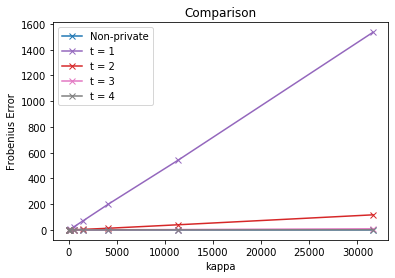

In [33]:
#Effect of varying u, spherical. Fix parameters d = 10, n = 7000, rho = 0.5. t = 1 through 4. 
args = utils.parse_args()
args.d = 10
dist_mean = torch.zeros(args.d)
dist_cov = 1*torch.eye(args.d)
args.n = 7000
args.total_budget = 0.5

Ps1 = [args.total_budget]
Ps2 = [(1.0/4.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps3 = [(1.0/8.0)*args.total_budget, (1.0/8.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps4 = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps5 = [(1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (3.0/4.0)*args.total_budget]


u_l = np.geomspace(np.sqrt(args.d), 10000*np.sqrt(args.d), num=10)
err_nonpr = []
err_t1 = []
err_t2 = []
err_t3 = []
err_t4 = []
err_t5 = []

for i, u in enumerate(u_l):
    args.u = u
    non_pr = []
    covs_t1 = []
    covs_t2 = []
    covs_t3 = []
    covs_t4 = []
    covs_t5 = []
    print(u)
    for i in range(100):
        if i % 50 == 0: print(i)
        X = torch.distributions.MultivariateNormal(dist_mean, dist_cov).sample((args.n,))
        non_pr.append(mahalanobis_dist(utils.cov(X.clone()), dist_cov))

        args.t = 1
        args.rho = Ps1
        covs_t1.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 2
        args.rho = Ps2
        covs_t2.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 3
        args.rho = Ps3
        covs_t3.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
          
        args.t = 4
        args.rho = Ps4
        covs_t4.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 5
        args.rho = Ps5
        covs_t5.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
    err_nonpr.append(stats.trim_mean(non_pr,0.1))
    err_t1.append(stats.trim_mean(covs_t1,0.1))
    err_t2.append(stats.trim_mean(covs_t2,0.1))
    err_t3.append(stats.trim_mean(covs_t3,0.1))
    err_t4.append(stats.trim_mean(covs_t4,0.1))
    err_t5.append(stats.trim_mean(covs_t5,0.1))
    
np.savetxt("./results/synthetic_cov/u-2.txt", np.array(u_l))
np.savetxt("./results/synthetic_cov/nonpr-2.txt", np.array(err_nonpr))
np.savetxt("./results/synthetic_cov/t1-2.txt", np.array(err_t1))
np.savetxt("./results/synthetic_cov/t2-2.txt", np.array(err_t2))
np.savetxt("./results/synthetic_cov/t3-2.txt", np.array(err_t3))
np.savetxt("./results/synthetic_cov/t4-2.txt", np.array(err_t4))
np.savetxt("./results/synthetic_cov/t5-2.txt", np.array(err_t5))       
    
fig, ax = plt.subplots()
ax.plot(u_l, err_nonpr, marker="x", label='Non-private', color='#1f77b4')
ax.plot(u_l, err_t1, marker="x", label='t = 1', color='#9467bd')
ax.plot(u_l, err_t2, marker="x", label='t = 2', color='#d62728')
ax.plot(u_l, err_t3, marker="x", label='t = 3', color='#e377c2')
ax.plot(u_l, err_t4, marker="x", label='t = 4', color='#7f7f7f')

ax.set_xlabel('K')
ax.set_ylabel('Frobenius Error')
ax.set_title("Comparison")
ax.legend()

1000.0
0
50
1181.8181818181818
0
50
1363.6363636363635
0
50
1545.4545454545455
0
50
1727.2727272727273
0
50
1909.090909090909
0
50
2090.909090909091
0
50
2272.727272727273
0
50
2454.5454545454545
0
50
2636.363636363636
0
50
2818.181818181818
0
50
3000.0
0
50


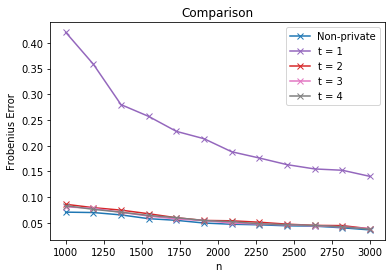

In [34]:
#Low dimension, spherical. Vary n. Fix parameters d = 2, u = 10*sqrt(d), rho = 0.5. t = 1 through 4.
args = utils.parse_args()
args.d = 2
dist_mean = torch.zeros(args.d)
dist_cov = torch.eye(args.d)
args.u = 10*np.sqrt(args.d)
args.total_budget = .5

Ps1 = [args.total_budget]
Ps2 = [(1.0/4.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps3 = [(1.0/8.0)*args.total_budget, (1.0/8.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps4 = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (3.0/4.0)*args.total_budget]

n_l = np.linspace(1000, 3000, num=12)
err_nonpr = []
err_t1 = []
err_t2 = []
err_t3 = []
err_t4 = []

for i, n in enumerate(n_l):
    args.n = int(n)
    non_pr = []
    covs_t1 = []
    covs_t2 = []
    covs_t3 = []
    covs_t4 = []
    print(n)
    for i in range(100):
        if i % 50 == 0: print(i)
        X = torch.distributions.MultivariateNormal(dist_mean, dist_cov).sample((args.n,))
        non_pr.append(mahalanobis_dist(utils.cov(X.clone()), dist_cov))

        args.t = 1
        args.rho = Ps1
        covs_t1.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 2
        args.rho = Ps2
        covs_t2.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 3
        args.rho = Ps3
        covs_t3.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
          
        args.t = 4
        args.rho = Ps4
        covs_t4.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
                        
    err_nonpr.append(stats.trim_mean(non_pr,0.1))
    err_t1.append(stats.trim_mean(covs_t1,0.1))
    err_t2.append(stats.trim_mean(covs_t2,0.1))
    err_t3.append(stats.trim_mean(covs_t3,0.1))
    err_t4.append(stats.trim_mean(covs_t4,0.1))
    
np.savetxt("./results/synthetic_cov/n-3.txt", np.array(n_l))
np.savetxt("./results/synthetic_cov/nonpr-3.txt", np.array(err_nonpr))
np.savetxt("./results/synthetic_cov/t1-3.txt", np.array(err_t1))
np.savetxt("./results/synthetic_cov/t2-3.txt", np.array(err_t2))
np.savetxt("./results/synthetic_cov/t3-3.txt", np.array(err_t3))
np.savetxt("./results/synthetic_cov/t4-3.txt", np.array(err_t4))    
    
fig, ax = plt.subplots()
ax.plot(n_l, err_nonpr, marker="x", label='Non-private', color='#1f77b4')
ax.plot(n_l, err_t1, marker="x", label='t = 1', color='#9467bd')
ax.plot(n_l, err_t2, marker="x", label='t = 2', color='#d62728')
ax.plot(n_l, err_t3, marker="x", label='t = 3', color='#e377c2')
ax.plot(n_l, err_t4, marker="x", label='t = 4', color='#7f7f7f')

ax.set_xlabel('n')
ax.set_ylabel('Frobenius Error')
ax.set_title("Comparison")
ax.legend()

10000.0
0
50
16363.636363636364
0
50
22727.272727272728
0
50
29090.909090909092
0
50
35454.545454545456
0
50
41818.18181818182
0
50
48181.818181818184
0
50
54545.454545454544
0
50
60909.09090909091
0
50
67272.72727272728
0
50
73636.36363636365
0
50
80000.0
0
50


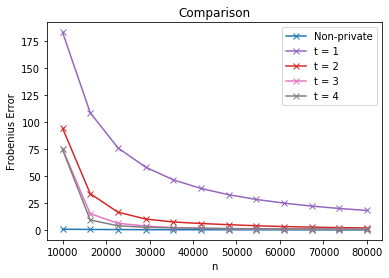

In [35]:
#High dimension, spherical. Vary n. Fix parameters d = 100, u = 10*sqrt(d), rho = 0.5. t = 1 through 4.
args = utils.parse_args()
args.d = 100
dist_mean = torch.zeros(args.d)
dist_cov = torch.eye(args.d)
args.u = 10*np.sqrt(args.d)
args.total_budget = .5

Ps1 = [args.total_budget]
Ps2 = [(1.0/4.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps3 = [(1.0/8.0)*args.total_budget, (1.0/8.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps4 = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (3.0/4.0)*args.total_budget]

n_l = np.linspace(10000, 80000, num=12)
err_nonpr = []
err_t1 = []
err_t2 = []
err_t3 = []
err_t4 = []

for i, n in enumerate(n_l):
    args.n = int(n)
    non_pr = []
    covs_t1 = []
    covs_t2 = []
    covs_t3 = []
    covs_t4 = []
    print(n)
    for i in range(100):
        if i % 50 == 0: print(i)
        X = torch.distributions.MultivariateNormal(dist_mean, dist_cov).sample((args.n,))
        non_pr.append(mahalanobis_dist(utils.cov(X.clone()), dist_cov))

        args.t = 1
        args.rho = Ps1
        covs_t1.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 2
        args.rho = Ps2
        covs_t2.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 3
        args.rho = Ps3
        covs_t3.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
          
        args.t = 4
        args.rho = Ps4
        covs_t4.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
                        
    err_nonpr.append(stats.trim_mean(non_pr,0.1))
    err_t1.append(stats.trim_mean(covs_t1,0.1))
    err_t2.append(stats.trim_mean(covs_t2,0.1))
    err_t3.append(stats.trim_mean(covs_t3,0.1))
    err_t4.append(stats.trim_mean(covs_t4,0.1))
    
np.savetxt("./results/synthetic_cov/n-4.txt", np.array(n_l))
np.savetxt("./results/synthetic_cov/nonpr-4.txt", np.array(err_nonpr))
np.savetxt("./results/synthetic_cov/t1-4.txt", np.array(err_t1))
np.savetxt("./results/synthetic_cov/t2-4.txt", np.array(err_t2))
np.savetxt("./results/synthetic_cov/t3-4.txt", np.array(err_t3))
np.savetxt("./results/synthetic_cov/t4-4.txt", np.array(err_t4))       
    
fig, ax = plt.subplots()
ax.plot(n_l, err_nonpr, marker="x", label='Non-private', color='#1f77b4')
ax.plot(n_l, err_t1, marker="x", label='t = 1', color='#9467bd')
ax.plot(n_l, err_t2, marker="x", label='t = 2', color='#d62728')
ax.plot(n_l, err_t3, marker="x", label='t = 3', color='#e377c2')
ax.plot(n_l, err_t4, marker="x", label='t = 4', color='#7f7f7f')

ax.set_xlabel('n')
ax.set_ylabel('Frobenius Error')
ax.set_title("Comparison")
ax.legend()

0.004999999999999999
0
50
0.008340502686000294
0
50
0.01391279701103562
0
50
0.023207944168063883
0
50
0.03871318413405634
0
50
0.0645774832507442
0
50
0.10772173450159415
0
50
0.17969068319023127
0
50
0.2997421251594704
0
50
0.5
0
50


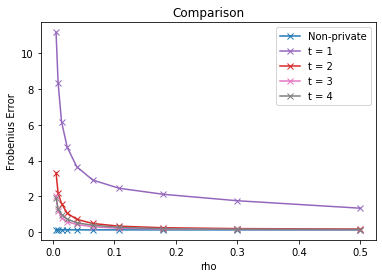

In [48]:
#Effect of privacy, spherical. Vary rho. Fix parameters d = 10, u = 10*sqrt(d), n = 8000. t = 1 through 4.
args = utils.parse_args()
args.d = 10
dist_mean = torch.zeros(args.d)
dist_cov = torch.eye(args.d)
args.u = 10*np.sqrt(args.d)
args.n = 8000


r_l = np.geomspace(0.005, 0.5, num=10)
err_nonpr = []
err_t1 = []
err_t2 = []
err_t3 = []
err_t4 = []

for i, r in enumerate(r_l):
    non_pr = []
    covs_t1 = []
    covs_t2 = []
    covs_t3 = []
    covs_t4 = []
    
    args.total_budget = r
    Ps1 = [args.total_budget]
    Ps2 = [(1.0/4.0)*args.total_budget, (3.0/4.0)*args.total_budget]
    Ps3 = [(1.0/8.0)*args.total_budget, (1.0/8.0)*args.total_budget, (3.0/4.0)*args.total_budget]
    Ps4 = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (3.0/4.0)*args.total_budget]
    print(r)
    
    for i in range(100):
        if i % 50 == 0: print(i)
        X = torch.distributions.MultivariateNormal(dist_mean, dist_cov).sample((args.n,))
        non_pr.append(mahalanobis_dist(utils.cov(X.clone()), dist_cov))

        args.t = 1
        args.rho = Ps1
        covs_t1.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 2
        args.rho = Ps2
        covs_t2.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
        
        args.t = 3
        args.rho = Ps3
        covs_t3.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
          
        args.t = 4
        args.rho = Ps4
        covs_t4.append(mahalanobis_dist(cov_est(X.clone(), args), dist_cov))
                
        
    err_nonpr.append(stats.trim_mean(non_pr,0.1))
    err_t1.append(stats.trim_mean(covs_t1,0.1))
    err_t2.append(stats.trim_mean(covs_t2,0.1))
    err_t3.append(stats.trim_mean(covs_t3,0.1))
    err_t4.append(stats.trim_mean(covs_t4,0.1))
    
fig, ax = plt.subplots()
ax.plot(r_l, err_nonpr, marker="x", label='Non-private', color='#1f77b4')
ax.plot(r_l, err_t1, marker="x", label='t = 1', color='#9467bd')
ax.plot(r_l, err_t2, marker="x", label='t = 2', color='#d62728')
ax.plot(r_l, err_t3, marker="x", label='t = 3', color='#e377c2')
ax.plot(r_l, err_t4, marker="x", label='t = 4', color='#7f7f7f')

np.savetxt("./results/synthetic_cov/r-5.txt", np.array(r_l))
np.savetxt("./results/synthetic_cov/nonpr-5.txt", np.array(err_nonpr))
np.savetxt("./results/synthetic_cov/t1-5.txt", np.array(err_t1))
np.savetxt("./results/synthetic_cov/t2-5.txt", np.array(err_t2))
np.savetxt("./results/synthetic_cov/t3-5.txt", np.array(err_t3))
np.savetxt("./results/synthetic_cov/t4-5.txt", np.array(err_t4))

ax.set_xlabel('rho')
ax.set_ylabel('Frobenius Error')
ax.set_title("Comparison")
ax.legend()

3000.0
0
50
3454.5454545454545
0
50
3909.090909090909
0
50
4363.636363636364
0
50
4818.181818181818
0
50
5272.727272727273
0
50
5727.272727272728
0
50
6181.818181818182
0
50
6636.363636363636
0
50
7090.909090909091
0
50
7545.454545454546
0
50
8000.0
0
50


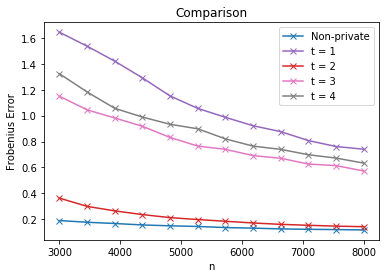

In [49]:
#Headline experiments, half-n-half. Vary n. Fix parameters d = 10, u = 10*sqrt(d), rho = 0.5. t = 1 through 4.
args = utils.parse_args()
args.d = 10
dist_mean = torch.zeros(args.d)
args.u = 10*np.sqrt(args.d)
dist_cov = torch.tensor([args.u] * int(args.d/2) + [1] * int(args.d/2)).diag_embed()
args.total_budget = .5

Ps1 = [args.total_budget]
Ps2 = [(1.0/4.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps3 = [(1.0/8.0)*args.total_budget, (1.0/8.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps4 = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps5 = [(1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (3.0/4.0)*args.total_budget]

n_l = np.linspace(3000, 8000, num=12)
err_nonpr = []
err_t1 = []
err_t2 = []
err_t3 = []
err_t4 = []
err_t5 = []

for i, n in enumerate(n_l):
    args.n = int(n)
    non_pr = []
    covs_t1 = []
    covs_t2 = []
    covs_t3 = []
    covs_t4 = []
    covs_t5 = []
    print(n)
    for i in range(100):
        if i % 50 == 0: print(i)
        rand_rot = torch.nn.init.orthogonal_(torch.zeros(args.d,args.d))
        rotated_cov = torch.mm(torch.mm(rand_rot, dist_cov), rand_rot.t())
        X = torch.distributions.MultivariateNormal(dist_mean, rotated_cov).sample((args.n,))
        non_pr.append(mahalanobis_dist(utils.cov(X.clone()), rotated_cov))

        args.t = 1
        args.rho = Ps1
        covs_t1.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 2
        args.rho = Ps2
        covs_t2.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 3
        args.rho = Ps3
        covs_t3.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
          
        args.t = 4
        args.rho = Ps4
        covs_t4.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 5
        args.rho = Ps5
        covs_t5.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
    err_nonpr.append(stats.trim_mean(non_pr,0.1))
    err_t1.append(stats.trim_mean(covs_t1,0.1))
    err_t2.append(stats.trim_mean(covs_t2,0.1))
    err_t3.append(stats.trim_mean(covs_t3,0.1))
    err_t4.append(stats.trim_mean(covs_t4,0.1))
    err_t5.append(stats.trim_mean(covs_t5,0.1))

np.savetxt("./results/synthetic_cov/n-6.txt", np.array(n_l))
np.savetxt("./results/synthetic_cov/nonpr-6.txt", np.array(err_nonpr))
np.savetxt("./results/synthetic_cov/t1-6.txt", np.array(err_t1))
np.savetxt("./results/synthetic_cov/t2-6.txt", np.array(err_t2))
np.savetxt("./results/synthetic_cov/t3-6.txt", np.array(err_t3))
np.savetxt("./results/synthetic_cov/t4-6.txt", np.array(err_t4))
np.savetxt("./results/synthetic_cov/t5-6.txt", np.array(err_t5))
    
fig, ax = plt.subplots()
ax.plot(n_l, err_nonpr, marker="x", label='Non-private', color='#1f77b4')
ax.plot(n_l, err_t1, marker="x", label='t = 1', color='#9467bd')
ax.plot(n_l, err_t2, marker="x", label='t = 2', color='#d62728')
ax.plot(n_l, err_t3, marker="x", label='t = 3', color='#e377c2')
ax.plot(n_l, err_t4, marker="x", label='t = 4', color='#7f7f7f')

ax.set_xlabel('n')
ax.set_ylabel('Frobenius Error')
ax.set_title("Comparison")
ax.legend()

3.1622776601683795
0
50
8.79922543569107
0
50
24.484367468222267
0
50
68.12920690579611
0
50
189.57356524063755
0
50
527.499706370262
0
50
1467.799267622069
0
50
4084.238652674517
0
50
11364.636663857242
0
50
31622.776601683792
0
50


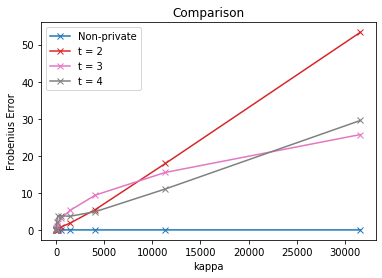

In [50]:
#Effect of varying u, half-n-half. Fix parameters d = 10, n = 7000, rho = 0.5. t = 1 through 4. 
args = utils.parse_args()
args.d = 10
dist_mean = torch.zeros(args.d)
args.n = 7000
args.total_budget = 0.5

Ps1 = [args.total_budget]
Ps2 = [(1.0/4.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps3 = [(1.0/8.0)*args.total_budget, (1.0/8.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps4 = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps5 = [(1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (1.0/16.0)*args.total_budget, (3.0/4.0)*args.total_budget]

u_l = np.geomspace(np.sqrt(args.d), 10000*np.sqrt(args.d), num=10)
err_nonpr = []
err_t1 = []
err_t2 = []
err_t3 = []
err_t4 = []
err_t5 = []

for i, u in enumerate(u_l):
    args.u = u
    dist_cov = torch.tensor([args.u] * int(args.d/2) + [1] * int(args.d/2)).diag_embed()
    non_pr = []
    covs_t1 = []
    covs_t2 = []
    covs_t3 = []
    covs_t4 = []
    covs_t5 = []
    print(u)
    for i in range(100):
        if i % 50 == 0: print(i)
        rand_rot = torch.nn.init.orthogonal_(torch.zeros(args.d,args.d))
        rotated_cov = torch.mm(torch.mm(rand_rot, dist_cov), rand_rot.t())
        X = torch.distributions.MultivariateNormal(dist_mean, rotated_cov).sample((args.n,))
        non_pr.append(mahalanobis_dist(utils.cov(X.clone()), rotated_cov))

        args.t = 1
        args.rho = Ps1
        covs_t1.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 2
        args.rho = Ps2
        covs_t2.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 3
        args.rho = Ps3
        covs_t3.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
          
        args.t = 4
        args.rho = Ps4
        covs_t4.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))

        args.t = 5
        args.rho = Ps5
        covs_t5.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))

        
    err_nonpr.append(stats.trim_mean(non_pr,0.1))
    err_t1.append(stats.trim_mean(covs_t1,0.1))
    err_t2.append(stats.trim_mean(covs_t2,0.1))
    err_t3.append(stats.trim_mean(covs_t3,0.1))
    err_t4.append(stats.trim_mean(covs_t4,0.1))
    err_t5.append(stats.trim_mean(covs_t5,0.1))
    
np.savetxt("./results/synthetic_cov/u-7.txt", np.array(u_l))
np.savetxt("./results/synthetic_cov/nonpr-7.txt", np.array(err_nonpr))
np.savetxt("./results/synthetic_cov/t1-7.txt", np.array(err_t1))
np.savetxt("./results/synthetic_cov/t2-7.txt", np.array(err_t2))
np.savetxt("./results/synthetic_cov/t3-7.txt", np.array(err_t3))
np.savetxt("./results/synthetic_cov/t4-7.txt", np.array(err_t4))
np.savetxt("./results/synthetic_cov/t5-7.txt", np.array(err_t5))    
    
fig, ax = plt.subplots()
ax.plot(u_l, err_nonpr, marker="x", label='Non-private', color='#1f77b4')
ax.plot(u_l, err_t2, marker="x", label='t = 2', color='#d62728')
ax.plot(u_l, err_t3, marker="x", label='t = 3', color='#e377c2')
ax.plot(u_l, err_t4, marker="x", label='t = 4', color='#7f7f7f')

ax.set_xlabel('K')
ax.set_ylabel('Frobenius Error')
ax.set_title("Comparison")
ax.legend()

1000.0
0
50
1181.8181818181818
0
50
1363.6363636363635
0
50
1545.4545454545455
0
50
1727.2727272727273
0
50
1909.090909090909
0
50
2090.909090909091
0
50
2272.727272727273
0
50
2454.5454545454545
0
50
2636.363636363636
0
50
2818.181818181818
0
50
3000.0
0
50


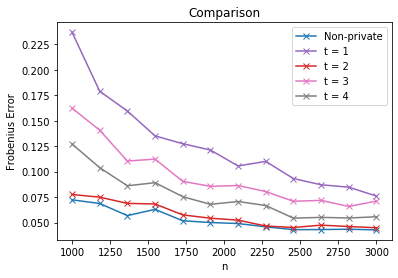

In [51]:
#Low dimension, half-n-half. Vary n. Fix parameters d = 2, u = 10*sqrt(d), rho = 0.5. t = 1 through 4.
args = utils.parse_args()
args.d = 2
dist_mean = torch.zeros(args.d)
args.u = 10*np.sqrt(args.d)
dist_cov = torch.tensor([args.u] * int(args.d/2) + [1] * int(args.d/2)).diag_embed()
args.total_budget = .5

Ps1 = [args.total_budget]
Ps2 = [(1.0/4.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps3 = [(1.0/8.0)*args.total_budget, (1.0/8.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps4 = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (3.0/4.0)*args.total_budget]

n_l = np.linspace(1000, 3000, num=12)
err_nonpr = []
err_t1 = []
err_t2 = []
err_t3 = []
err_t4 = []

for i, n in enumerate(n_l):
    args.n = int(n)
    non_pr = []
    covs_t1 = []
    covs_t2 = []
    covs_t3 = []
    covs_t4 = []
    print(n)
    for i in range(100):
        if i % 50 == 0: print(i)
        rand_rot = torch.nn.init.orthogonal_(torch.zeros(args.d,args.d))
        rotated_cov = torch.mm(torch.mm(rand_rot, dist_cov), rand_rot.t())
        X = torch.distributions.MultivariateNormal(dist_mean, rotated_cov).sample((args.n,))
        non_pr.append(mahalanobis_dist(utils.cov(X.clone()), rotated_cov))

        args.t = 1
        args.rho = Ps1
        covs_t1.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 2
        args.rho = Ps2
        covs_t2.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 3
        args.rho = Ps3
        covs_t3.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
          
        args.t = 4
        args.rho = Ps4
        covs_t4.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
    err_nonpr.append(stats.trim_mean(non_pr,0.1))
    err_t1.append(stats.trim_mean(covs_t1,0.1))
    err_t2.append(stats.trim_mean(covs_t2,0.1))
    err_t3.append(stats.trim_mean(covs_t3,0.1))
    err_t4.append(stats.trim_mean(covs_t4,0.1))
    
np.savetxt("./results/synthetic_cov/n-8.txt", np.array(n_l))
np.savetxt("./results/synthetic_cov/nonpr-8.txt", np.array(err_nonpr))
np.savetxt("./results/synthetic_cov/t1-8.txt", np.array(err_t1))
np.savetxt("./results/synthetic_cov/t2-8.txt", np.array(err_t2))
np.savetxt("./results/synthetic_cov/t3-8.txt", np.array(err_t3))
np.savetxt("./results/synthetic_cov/t4-8.txt", np.array(err_t4))    
    
fig, ax = plt.subplots()
ax.plot(n_l, err_nonpr, marker="x", label='Non-private', color='#1f77b4')
ax.plot(n_l, err_t1, marker="x", label='t = 1', color='#9467bd')
ax.plot(n_l, err_t2, marker="x", label='t = 2', color='#d62728')
ax.plot(n_l, err_t3, marker="x", label='t = 3', color='#e377c2')
ax.plot(n_l, err_t4, marker="x", label='t = 4', color='#7f7f7f')

ax.set_xlabel('n')
ax.set_ylabel('Frobenius Error')
ax.set_title("Comparison")
ax.legend()

10000.0
0
50
16363.636363636364
0
50
22727.272727272728
0
50
29090.909090909092
0
50
35454.545454545456
0
50
41818.18181818182
0
50
48181.818181818184
0
50
54545.454545454544
0
50
60909.09090909091
0
50
67272.72727272728
0
50
73636.36363636365
0
50
80000.0
0
50


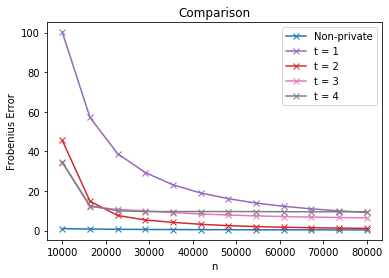

In [52]:
#High dimension, half-n-half. Vary n. Fix parameters d = 100, u = 10*sqrt(d), rho = 0.5. t = 1 through 4.
args = utils.parse_args()
args.d = 100
dist_mean = torch.zeros(args.d)
args.u = 10*np.sqrt(args.d)
dist_cov = torch.tensor([args.u] * int(args.d/2) + [1] * int(args.d/2)).diag_embed()
args.total_budget = .5

Ps1 = [args.total_budget]
Ps2 = [(1.0/4.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps3 = [(1.0/8.0)*args.total_budget, (1.0/8.0)*args.total_budget, (3.0/4.0)*args.total_budget]
Ps4 = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (3.0/4.0)*args.total_budget]

n_l = np.linspace(10000, 80000, num=12)
err_nonpr = []
err_t1 = []
err_t2 = []
err_t3 = []
err_t4 = []

for i, n in enumerate(n_l):
    args.n = int(n)
    non_pr = []
    covs_t1 = []
    covs_t2 = []
    covs_t3 = []
    covs_t4 = []
    print(n)
    for i in range(100):
        if i % 50 == 0: print(i)
        rand_rot = torch.nn.init.orthogonal_(torch.zeros(args.d,args.d))
        rotated_cov = torch.mm(torch.mm(rand_rot, dist_cov), rand_rot.t())
        X = torch.distributions.MultivariateNormal(dist_mean, rotated_cov).sample((args.n,))
        non_pr.append(mahalanobis_dist(utils.cov(X.clone()), rotated_cov))

        args.t = 1
        args.rho = Ps1
        covs_t1.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 2
        args.rho = Ps2
        covs_t2.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 3
        args.rho = Ps3
        covs_t3.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
          
        args.t = 4
        args.rho = Ps4
        covs_t4.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
    err_nonpr.append(stats.trim_mean(non_pr,0.1))
    err_t1.append(stats.trim_mean(covs_t1,0.1))
    err_t2.append(stats.trim_mean(covs_t2,0.1))
    err_t3.append(stats.trim_mean(covs_t3,0.1))
    err_t4.append(stats.trim_mean(covs_t4,0.1))
    
np.savetxt("./results/synthetic_cov/n-9.txt", np.array(n_l))
np.savetxt("./results/synthetic_cov/nonpr-9.txt", np.array(err_nonpr))
np.savetxt("./results/synthetic_cov/t1-9.txt", np.array(err_t1))
np.savetxt("./results/synthetic_cov/t2-9.txt", np.array(err_t2))
np.savetxt("./results/synthetic_cov/t3-9.txt", np.array(err_t3))
np.savetxt("./results/synthetic_cov/t4-9.txt", np.array(err_t4))    
    
fig, ax = plt.subplots()
ax.plot(n_l, err_nonpr, marker="x", label='Non-private', color='#1f77b4')
ax.plot(n_l, err_t1, marker="x", label='t = 1', color='#9467bd')
ax.plot(n_l, err_t2, marker="x", label='t = 2', color='#d62728')
ax.plot(n_l, err_t3, marker="x", label='t = 3', color='#e377c2')
ax.plot(n_l, err_t4, marker="x", label='t = 4', color='#7f7f7f')

ax.set_xlabel('n')
ax.set_ylabel('Frobenius Error')
ax.set_title("Comparison")
ax.legend()

0.004999999999999999
0
50
0.008340502686000294
0
50
0.01391279701103562
0
50
0.023207944168063883
0
50
0.03871318413405634
0
50
0.0645774832507442
0
50
0.10772173450159415
0
50
0.17969068319023127
0
50
0.2997421251594704
0
50
0.5
0
50


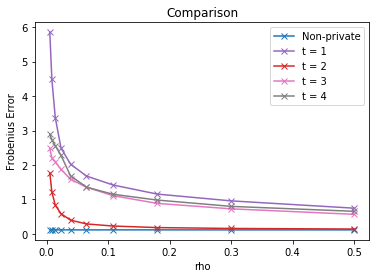

In [53]:
#Effect of privacy, half-n-half. Vary rho. Fix parameters d = 10, u = 10*sqrt(d), n = 8000. t = 1 through 4.
args = utils.parse_args()
args.d = 10
dist_mean = torch.zeros(args.d)
args.u = 10*np.sqrt(args.d)
dist_cov = torch.tensor([args.u] * int(args.d/2) + [1] * int(args.d/2)).diag_embed()
args.n = 8000


r_l = np.geomspace(0.005, 0.5, num=10)
err_nonpr = []
err_t1 = []
err_t2 = []
err_t3 = []
err_t4 = []

for i, r in enumerate(r_l):
    non_pr = []
    covs_t1 = []
    covs_t2 = []
    covs_t3 = []
    covs_t4 = []
    
    args.total_budget = r
    Ps1 = [args.total_budget]
    Ps2 = [(1.0/4.0)*args.total_budget, (3.0/4.0)*args.total_budget]
    Ps3 = [(1.0/8.0)*args.total_budget, (1.0/8.0)*args.total_budget, (3.0/4.0)*args.total_budget]
    Ps4 = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (3.0/4.0)*args.total_budget]
    print(r)
    
    for i in range(100):
        if i % 50 == 0: print(i)
        rand_rot = torch.nn.init.orthogonal_(torch.zeros(args.d,args.d))
        rotated_cov = torch.mm(torch.mm(rand_rot, dist_cov), rand_rot.t())
        X = torch.distributions.MultivariateNormal(dist_mean, rotated_cov).sample((args.n,))
        non_pr.append(mahalanobis_dist(utils.cov(X.clone()), rotated_cov))

        args.t = 1
        args.rho = Ps1
        covs_t1.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 2
        args.rho = Ps2
        covs_t2.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
        args.t = 3
        args.rho = Ps3
        covs_t3.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
          
        args.t = 4
        args.rho = Ps4
        covs_t4.append(mahalanobis_dist(cov_est(X.clone(), args), rotated_cov))
        
    err_nonpr.append(stats.trim_mean(non_pr,0.1))
    err_t1.append(stats.trim_mean(covs_t1,0.1))
    err_t2.append(stats.trim_mean(covs_t2,0.1))
    err_t3.append(stats.trim_mean(covs_t3,0.1))
    err_t4.append(stats.trim_mean(covs_t4,0.1))

np.savetxt("./results/synthetic_cov/r-10.txt", np.array(r_l))
np.savetxt("./results/synthetic_cov/nonpr-10.txt", np.array(err_nonpr))
np.savetxt("./results/synthetic_cov/t1-10.txt", np.array(err_t1))
np.savetxt("./results/synthetic_cov/t2-10.txt", np.array(err_t2))
np.savetxt("./results/synthetic_cov/t3-10.txt", np.array(err_t3))
np.savetxt("./results/synthetic_cov/t4-10.txt", np.array(err_t4)) 
    
fig, ax = plt.subplots()
ax.plot(r_l, err_nonpr, marker="x", label='Non-private', color='#1f77b4')
ax.plot(r_l, err_t1, marker="x", label='t = 1', color='#9467bd')
ax.plot(r_l, err_t2, marker="x", label='t = 2', color='#d62728')
ax.plot(r_l, err_t3, marker="x", label='t = 3', color='#e377c2')
ax.plot(r_l, err_t4, marker="x", label='t = 4', color='#7f7f7f')

ax.set_xlabel('rho')
ax.set_ylabel('Frobenius Error')
ax.set_title("Comparison")
ax.legend()

Dot product between top components: 0.6240057945251465
Dot product between second components: -0.2233971357345581
Dot product between top components: 0.9403192400932312
Dot product between second components: -0.5615696907043457
Dot product between top components: 0.9813249111175537
Dot product between second components: -0.7654401659965515
Dot product between top components: 0.975502073764801
Dot product between second components: 0.79313725233078
Dot product between top components: 0.9802761077880859
Dot product between second components: -0.9302902817726135


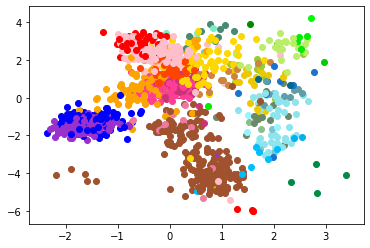

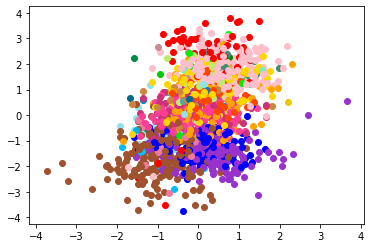

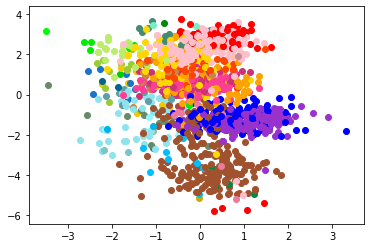

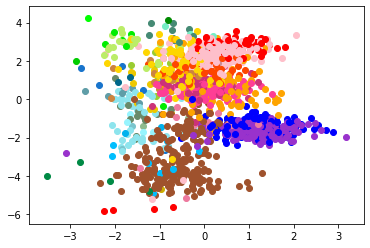

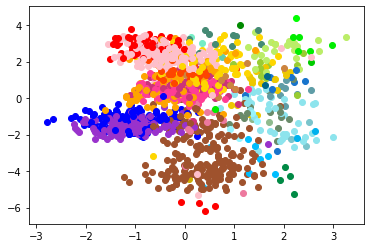

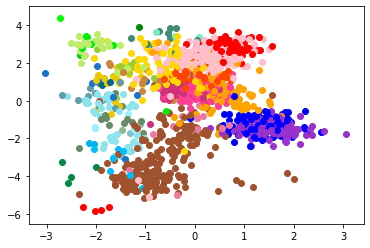

In [3]:
d = 20

f = open('./data/colors.txt')
color_map = dict()
for line in f:
    mapping = line.split()
    color_map[mapping[0]] = (float(mapping[1])/256.0, float(mapping[2])/256.0, float(mapping[3])/256.0)

f = open('./data/POPRESID_Color.txt')
color_list = []
for line in f:
    col_pair = line.split()
    color_list.append(color_map[col_pair[1]])
f.close()

f = open('./data/POPRES_08_24_01.EuroThinFinal.LD_0.8.exLD.out0-PCA.eigs.txt')
V = np.loadtxt(f, skiprows = 1, usecols = (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21), dtype={'names': ('col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20'), 'formats': ('float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float', 'float')})
V = [torch.Tensor(x) for x in V]
V = torch.stack(V)
f.close()

f = open('./data/POPRES_08_24_01.EuroThinFinal.LD_0.8.exLD.out0-PCA.eval.txt')
eigs = [float(x) for x in f.readlines()]
eigs = torch.Tensor(eigs[0:d])
f.close()

data = V * eigs
data = torch.mm(20 * data, torch.nn.init.orthogonal_(torch.zeros(d,d)))
#Non-private stuff
cov = utils.cov(data)
dataU, dataS, dataV = cov.svd()
xs = torch.mv(data, dataU[:,1])
ys = torch.mv(data, -dataU[:,0])
fig, ax = plt.subplots()
for i in range(len(color_list)):
    plt.scatter(xs[i],ys[i], color = color_list[i])
    
args = utils.parse_args()
args.d = d
args.n = 1387
args.t = 1
args.total_budget = 1.0
args.rho = [args.total_budget]
args.u = 30
cov_t1 = cov_est(data.clone(), args)
covt1U, covt1S, covt1V = cov_t1.svd()
xst1 = torch.mv(data, covt1U[:,1])
yst1 = torch.mv(data, -covt1U[:,0])

dp1_t1 = torch.dot(dataU[:,0], covt1U[:,0])
dp2_t1 = torch.dot(dataU[:,1], covt1U[:,1])
print("Dot product between top components: " + str(dp1_t1.item()))
print("Dot product between second components: " + str(dp2_t1.item()))

fig, ax = plt.subplots()
for i in range(len(color_list)):
    plt.scatter(xst1[i],yst1[i], color = color_list[i])
    
args.t = 2
args.rho = [0.25*args.total_budget, 0.75*args.total_budget]
cov_t2 = cov_est(data.clone(), args)
covt2U, covt2S, covt2V = cov_t2.svd()
xst2 = torch.mv(data, covt2U[:,1])
yst2 = torch.mv(data, -covt2U[:,0])

dp1_t2 = torch.dot(dataU[:,0], covt2U[:,0])
dp2_t2 = torch.dot(dataU[:,1], covt2U[:,1])
print("Dot product between top components: " + str(dp1_t2.item()))
print("Dot product between second components: " + str(dp2_t2.item()))


fig, ax = plt.subplots()
for i in range(len(color_list)):
    plt.scatter(xst2[i],yst2[i], color = color_list[i])

args.t = 3
args.rho = [0.125*args.total_budget, 0.125*args.total_budget, 0.75*args.total_budget]
cov_t3 = cov_est(data.clone(), args)
covt3U, covt3S, covt3V = cov_t3.svd()
xst3 = torch.mv(data, covt3U[:,1])
yst3 = torch.mv(data, -covt3U[:,0])

dp1_t3 = torch.dot(dataU[:,0], covt3U[:,0])
dp2_t3 = torch.dot(dataU[:,1], covt3U[:,1])
print("Dot product between top components: " + str(dp1_t3.item()))
print("Dot product between second components: " + str(dp2_t3.item()))

fig, ax = plt.subplots()
for i in range(len(color_list)):
    plt.scatter(xst3[i],yst3[i], color = color_list[i])
    
args.t = 4
args.rho = [(1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, (1.0/12.0)*args.total_budget, 0.75*args.total_budget]
cov_t4 = cov_est(data.clone(), args)
covt4U, covt4S, covt4V = cov_t4.svd()
xst4 = torch.mv(data, covt4U[:,1])
yst4 = torch.mv(data, -covt4U[:,0])

dp1_t4 = torch.dot(dataU[:,0], covt4U[:,0])
dp2_t4 = torch.dot(dataU[:,1], covt4U[:,1])
print("Dot product between top components: " + str(dp1_t4.item()))
print("Dot product between second components: " + str(dp2_t4.item()))

fig, ax = plt.subplots()
for i in range(len(color_list)):
    plt.scatter(xst4[i],yst4[i], color = color_list[i])
    
args.t = 5
args.rho = [(1.0/15.0)*args.total_budget, (1.0/15.0)*args.total_budget, (1.0/15.0)*args.total_budget, (1.0/15.0)*args.total_budget, 0.75*args.total_budget]
cov_t5 = cov_est(data.clone(), args)
covt5U, covt5S, covt5V = cov_t5.svd()
xst5 = torch.mv(data, covt5U[:,1])
yst5 = torch.mv(data, -covt5U[:,0])

dp1_t5 = torch.dot(dataU[:,0], covt5U[:,0])
dp2_t5 = torch.dot(dataU[:,1], covt5U[:,1])
print("Dot product between top components: " + str(dp1_t5.item()))
print("Dot product between second components: " + str(dp2_t5.item()))

fig, ax = plt.subplots()
for i in range(len(color_list)):
    plt.scatter(xst5[i],yst5[i], color = color_list[i])
    
np.savetxt("./results/europe/colors.txt", np.array(color_list))
np.savetxt("./results/europe/dotprods.txt", np.array([dp1_t1, dp2_t1, dp1_t2, dp2_t2, dp1_t3, dp2_t3, dp1_t4, dp2_t4, dp1_t5, dp2_t5]))
np.savetxt("./results/europe/xs.txt", np.array(xs))
np.savetxt("./results/europe/ys.txt", np.array(ys))
np.savetxt("./results/europe/xst1.txt", np.array(xst1))
np.savetxt("./results/europe/yst1.txt", np.array(yst1))
np.savetxt("./results/europe/xst2.txt", np.array(xst2))
np.savetxt("./results/europe/yst2.txt", np.array(yst2))
np.savetxt("./results/europe/xst3.txt", np.array(xst3))
np.savetxt("./results/europe/yst3.txt", np.array(yst3))
np.savetxt("./results/europe/xst4.txt", np.array(xst4))
np.savetxt("./results/europe/yst4.txt", np.array(yst4))
np.savetxt("./results/europe/xst5.txt", np.array(xst5))
np.savetxt("./results/europe/yst5.txt", np.array(yst5))